
# Diseño de software para cómputo científico

----

## Unidad 2: Continuous Integration (CI)

## Integración Continua
-----

Cuando se trabaja en equipo cada desarrollador tiene una copia local del repositorio. A medida que el resto de los desarrolladores publican sus cambios, esa copia local comienza a diverger. Cuando se quieran publicar los cambios locales el riesgo de conflictos aumentan con el tiempo.

Esto puede llevar a un **Merge Hell**, donde el tiempo necesario para integrar los cambios puede ser mayor al tiempo que llevó desarrollarlos.

## Integración Continua
-----

El concepto de Integración Continua surge como necesidad de chequear frecuentemente la existencia de conflictos y minimizar su impacto. **¿Cuán frecuente? Todos los dias.** Esto garantiza que los conflictos, en caso de suceder, se deban a pocos cambios y sean fáciles de corregir.

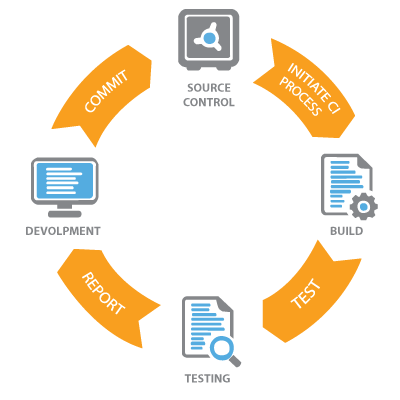

## GitHub Actions (gh-actions)
----

Github ofrece un servicio de CI que debemos configurar usando el plugin `tox-gh-actions`. Básicamente, la idea es **ejecutar tox automáticamente en cada push**.

**Paso 1 de 2**: configurar `tox.ini` agregando una seccion para gh-actions

```ini
[gh-actions]
python =
    3.8: py38
    3.9: py39, coverage, style, check-manifest
```

**Paso 2 de 2**: agregar un archivo de configuración YAML en el path: `ProyectoX/.github/workflow/ci.yml`

```yaml
# Contenido de ci.yml

name: ProyectoX

on:
  - push
  - pull_request

jobs:
  build:

    runs-on: ubuntu-latest
    strategy:
      matrix:
        python-version: [3.8, 3.9]

    steps:
      - uses: actions/checkout@master
      - name: Set up Python ${{ matrix.python-version }}
        uses: actions/setup-python@v2
        with:
          python-version: ${{ matrix.python-version}}
      - name: Install tox
        run: pip install tox tox-gh-actions
      - name: Test with tox
        run: tox -r
```